In [1]:
import os
import numpy as np
from ts_limit.grid import Grid
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [2]:

def plot_data(ts, j, marker):
    index = np.argmax(ts)
    #gm = Grid().get_gm(index)
    #g = gm[0]
    #m = gm[1]
    #best_me = np.array([m, g])
    ts = ts.reshape(30, 30)
    fig = plt.figure(j, dpi=150, figsize=(6.24136, 4))
    cmap = plt.get_cmap('seismic')
    levels = MaxNLocator(nbins=cmap.N).tick_values(-160, 160)
    ax = fig.add_subplot(111)
    norm = BoundaryNorm(levels, cmap.N)
    x_helper = np.linspace(-1, 2, num=30, endpoint=True)
    dx_2 = (x_helper[1] - x_helper[0]) / 2
    x = np.logspace(-1 - dx_2, 2 + dx_2, num=31, endpoint=True, base=10.0)
    y = np.logspace(-1 - dx_2, 2 + dx_2, num=31, endpoint=True, base=10.0)
    g_space = np.logspace(-1. - dx_2, 2. - dx_2, num=30, base=10.0, endpoint=True)    # in 1e-11 1/GeV
    m_space = np.logspace(-1. - dx_2, 2. - dx_2, num=30, base=10.0, endpoint=True)    # in neV
    grid = np.zeros((g_space.shape[0], m_space.shape[0], 2))
    for i in range(g_space.shape[0]):
        for j in range(m_space.shape[0]):
            grid[i, j, :] = g_space[i], m_space[j]
    grid = grid.reshape((m_space.shape[0] * g_space.shape[0], 2))
    xmin, xmax, ymin, ymax = 0.3, 30.0, 0.3, 7.0
    pcol = ax.pcolor(x, y, ts, cmap=cmap, norm=norm)
    _x = np.logspace(-1, 2, num=30, endpoint=True, base=10.0)
    _y = np.logspace(-1, 2, num=30, endpoint=True, base=10.0)
    cb = fig.colorbar(pcol, ax=ax, extend='neither', ticks=(-160, -80, -40, -20, 0, 20, 40, 80, 160), \
                 label='TS')
    ticklabels = cb.ax.get_yticklabels()
    cb.ax.set_yticklabels(ticklabels, ha='right')
    cb.ax.yaxis.set_tick_params(pad=20)
    ax.set_xlim((np.power(10, -1 - dx_2), np.power(10, 2+dx_2)))
    ax.set_ylim((np.power(10, -1 - dx_2), np.power(10, 2+dx_2)))
    ax.set_xlabel('$m_{a}$ [neV]')
    ax.set_ylabel('$g_{a\gamma\gamma}$ [$10^{-11}$ GeV$^{-1}$]')
    ax.set_xticks([1e-1, 1e0, 1e1, 1e2])
    ax.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], ha='left')
    ax.set_yticks([1e-1, 1e0, 1e1, 1e2])
    ax.set_yticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], ha='left')
    ax.yaxis.set_tick_params(pad=20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    for ma in marker:
        gm = Grid().get_gm(ma)
        g = gm[0]
        m = gm[1]
        ax.scatter(m, g, marker='x', size=0.5)
    #ax.scatter(best_me[0], best_me[1], marker='x')
    #ax.text(2.1, 0.10, '95\% exclusion', color=pcon.tcolors[-3][0])
    ax.yaxis.set_tick_params(pad=20, which='minor')
    ax.yaxis.set_tick_params(pad=20, which='major')
    fig.subplots_adjust(hspace=0)
    fig.patch.set_facecolor('white')
    fig.tight_layout(pad=2, h_pad=3, w_pad=10)
    
    return fig#, pcon

In [3]:
# generate index array
x_ind = np.arange(1, 30, 3)
index = []
for x in x_ind:
    for y in x_ind:
        index.append(x + 30 * y)

In [4]:
x_ind

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28])

In [21]:
# loop to save everything in .npy files per gm and simulated roi
counter = 0
for i in index:
    print(i)
    for r in range(10):
        print(r)
        ts = np.zeros(900)
        for j in range(900):
            dat = np.loadtxt(f'../outdata/h1/gm_{i}/roi_{r}/gm_{j:03}.dat')
            ts[j] = 2 * (dat[1] - dat[0])
        np.save(f'../outdata/h1/gm_{i}_roi_{r}.npy', ts)
    

31
0
1
2
3
4
5
6
7
8
9
121
0
1
2
3
4
5
6
7
8
9
211
0
1
2
3
4
5
6
7
8
9
301
0
1
2
3
4
5
6
7
8
9
391
0
1
2
3
4
5
6
7
8
9
481
0
1
2
3
4
5
6
7
8
9
571
0
1
2
3
4
5
6
7
8
9
661
0
1
2
3
4
5
6
7
8
9
751
0
1
2
3
4
5
6
7
8
9
841
0
1
2
3
4
5
6
7


KeyboardInterrupt: 

$TS = 2 (L_1 - L_0)$

$\lambda(m, g) = 2 (L_1(\hat m, \hat g) - L_1 (m, g)) \$

$$

In [6]:
# get lambda statistics from simulated data sets and save xx% value in lambda_thr nd.array
sim_num = 10
lambda_thr = np.zeros(900)
for i in index:
    lambda_gm = np.zeros(sim_num)
    for r in range(sim_num):
        #read data
        dat = np.load(f'../outdata/h1/gm_{i}_roi_{r}.npy')
        #max ts
        tsmax = np.max(dat)
        lambda_gm[r] = tsmax - dat[i]
        #print(lambda_roi)
        #print(np.min(lambda_roi))
    lambda_gm = np.sort(lambda_gm, axis=-1)
    lambda_thr[i] = lambda_gm[-2]
    #print(lambda_thr[i])

In [7]:
# read in actual TS data and make real data lambda values
lambda_real = np.zeros(900)
ts = np.zeros(900)
for i in range(900):
    dat = np.loadtxt(f'../outdata/jansson12c/orig_data/gm_{i:03}.dat')
    ts[i] = 2 * (dat[1] - dat[0])
lambda_real = np.max(ts) - ts
#print(lambda_real)

In [8]:
# make exclusion with entry=-160 if excluded
lambda_excl = np.zeros(900)
for i in index:
    if lambda_real[i] > lambda_thr[i]:
        lambda_excl[i] = -160
    else:
        pass

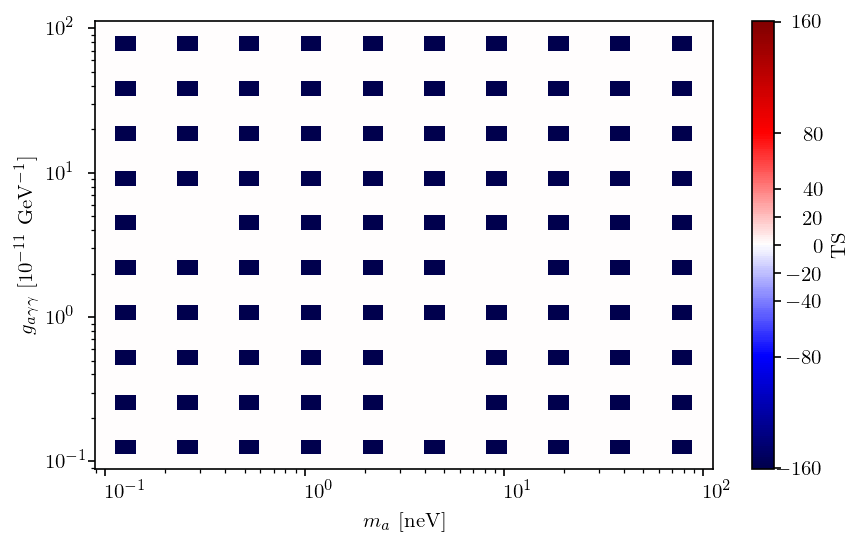

In [9]:
_ = plot_data(lambda_excl, 0, ())

In [ ]:
lambda_real[31]

In [ ]:
index

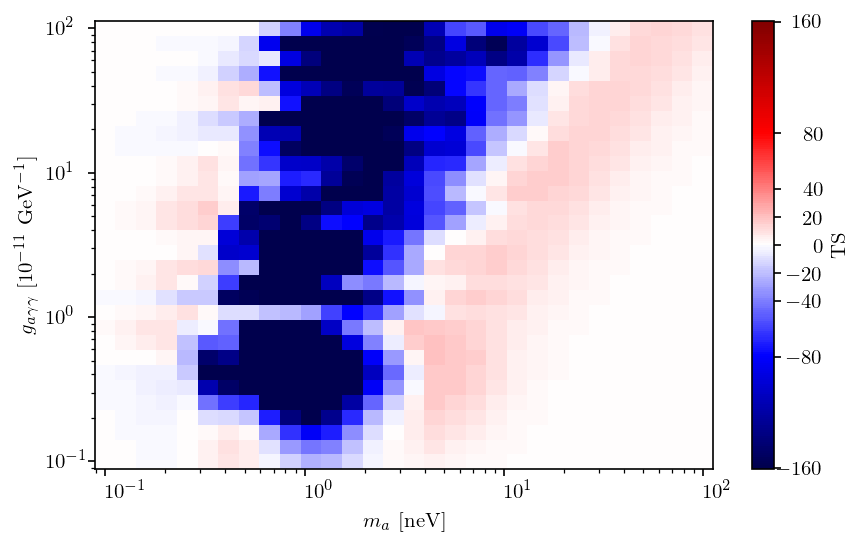

In [10]:
_ = plot_data(ts, 1, ())

In [11]:
lamb = np.zeros((len(index), 10))
for c, i in enumerate(index):
    print(i)
    lamb_ = np.zeros(10)
    for r in range(10):
        ts = np.load(f'../outdata/h1/gm_{i}_roi_{r}.npy')
        tsmax = np.max(ts)
        lamb_[r] = - ts[i] + tsmax
    lamb[c, :] = lamb_


31
121
211
301
391
481
571
661
751
841
34
124
214
304
394
484
574
664
754
844
37
127
217
307
397
487
577
667
757
847
40
130
220
310
400
490
580
670
760
850
43
133
223
313
403
493
583
673
763
853
46
136
226
316
406
496
586
676
766
856
49
139
229
319
409
499
589
679
769
859
52
142
232
322
412
502
592
682
772
862
55
145
235
325
415
505
595
685
775
865
58
148
238
328
418
508
598
688
778
868


In [12]:
lamb_sorted = np.sort(lamb, axis=-1)

In [13]:
orig_ts = np.zeros(900)
for i in range(900):
    dat = np.loadtxt(f'../outdata/jansson12c/orig_data/gm_{i:03}.dat')
    orig_ts[i] = 2 * (dat[1] - dat[0])


In [18]:
lamb_excl = np.zeros(900)
for c, i in enumerate(index):
    if orig_ts[i] < - lamb_sorted[c, -2]:# + np.max(orig_ts):
        lamb_excl[i] = -160
    else:
        pass

In [16]:
lamb_excl = np.zeros(900)
for c, i in enumerate(index):
    lamb_excl[i] = lamb_sorted[c, 8]


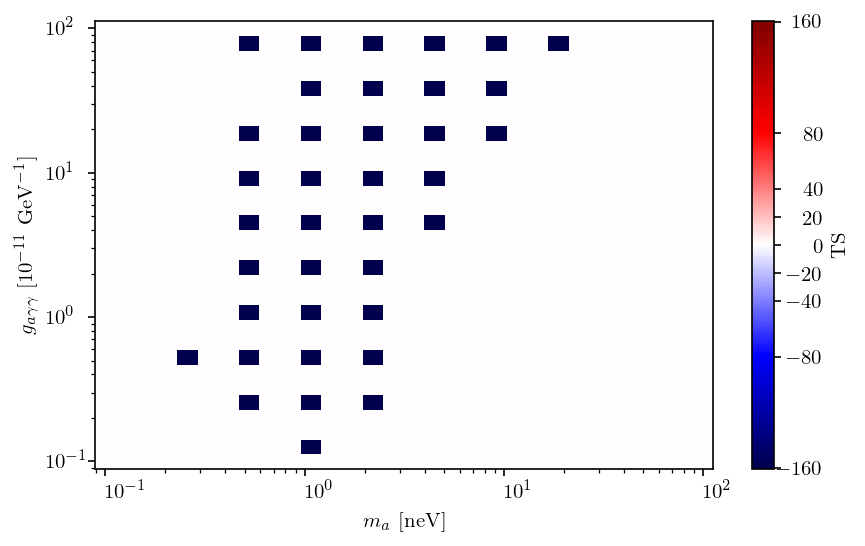

In [19]:
fig = plot_data(lamb_excl, 0, ())

In [25]:
fig.savefig('exclusion_from_h1_90.png')

In [ ]:
ts = np.zeros(900)
for i in range(900):
    dat = np.loadtxt(f'../outdata/h1/gm_645/roi_0/gm_{i:03}.dat')
    ts[i] = 2 * (dat[1] - dat[0])

In [ ]:
_ = plot_data(ts, 0, ())

In [ ]:
! ls ../outdata/jansson12c/orig_data

In [ ]:
ts = np.zeros((900, 2))
ts[:, 0] = orig_ts

In [ ]:
ts[:, 1] = np.arange(0, 900)

In [ ]:
np.sort(orig_ts)

In [ ]:
ts = np.zeros(900)
for i in range(900):
    dat = np.loadtxt(f'../outdata/h1/roi_0/gm_{i:03}.dat')
    ts[i] = 2 * (dat[1] - dat[0])

In [ ]:
_ = plot_data(ts, 0)

In [ ]:
for i in range(10):
    print(i)
    ts = np.zeros(900)
    for j in range(900):
        dat = np.loadtxt(f'../outdata/h1/roi_{i}/gm_{j:03}.dat')
        ts[j] = 2 * (dat[1] - dat[0])
    fig = plot_data(ts, i)
    plt.show()

In [ ]:
# read simulated loglikes
'''
ll = np.zeros((900, 100))
ll_max = np.zeros(100)
for j in range(100):
    for i in range(900):
        dat = np.loadtxt(f'../outdata/h1/roi_{j}/gm_{i:03}.dat')
        ll[i, j] = dat[1]
    ll_max[j] = np.max(ll[:, j])

# lambda as defined in 1603, is >= 0 (zero for \hat m, \hat g per data set)
lamb = 2 * (- ll + ll_max)
'''
lamb = np.zeros((900, 100))
for j in range(100):
    lamb[:, j] = - 2 * ( ll[:, j] - ll_max[j])
# read loglikes of real data
orig_ts = np.zeros(900)
for i in range(900):
    dat = np.loadtxt(f'../outdata/jansson12c/orig_data/gm_{i:03}.dat')
    orig_ts[i] = 2 * (dat[1] - dat[0])

# sort lambda for each pixel by size
lamb = np.sort(lamb, axis=-1)


lamb_excl = np.zeros(900)
for i in range(900):
    if orig_ts[i] < - lamb[i, 94] + np.max(orig_ts):
        lamb_excl[i] = -160
    else:
        pass

In [ ]:
lamb = np.zeros((900, 100))
for j in range(100):
    lamb[:, j] =  2 * (ll[:, j] - ll_max[j])

In [ ]:
lamb = np.sort(lamb, axis=-1)

In [ ]:
lamb[:, 94]

In [ ]:
_ = plot_data(lamb[:, 0], 10, ())

In [ ]:
lamb_excl = np.zeros(900)
# orig_ts       # original ts of data
# lamb[:, 8]    # 90% value of lambda distribution for each pixel
for i in range(900):
    if orig_ts[i] < - lamb[i, 94]:
        lamb_excl[i] = -160
    else:
        pass

In [ ]:
lamb_excl = np.zeros(900)
# orig_ts       # original ts of data
# lamb[:, 8]    # 90% value of lambda distribution for each pixel
for i in range(900):
    if orig_ts[i] < - lamb[i, 94] + np.max(orig_ts):
        lamb_excl[i] = -160
    else:
        pass
_ = plot_data(lamb_excl, 12, ())

In [ ]:
lamb[645], orig_ts[645]

In [ ]:
orig_ts[875]

In [ ]:
plt.hist(lamb[0])
plt.show()

In [ ]:
np.save('loglikes_h1.npy', ll)

In [ ]:
np.save('loglikes_max_h1.npy', ll_max)

In [ ]:
# read simulated loglikes

ll = np.zeros((900, 10))
ll_max = np.zeros(10)
for j in range(10):
    for i in range(900):
        dat = np.loadtxt(f'../outdata/h1/gm_645/roi_{j}/gm_{i:03}.dat')
        ll[i, j] = dat[1]
    ll_max[j] = np.max(ll[:, j])

# lambda as defined in 1603, is >= 0 (zero for \hat m, \hat g per data set)
#lamb = 2 * (- ll + ll_max)

lamb = np.zeros((900, 10))
for j in range(10):
    lamb[:, j] = - 2 * ( ll[:, j] - ll_max[j])

# read loglikes of real data
orig_ts = np.zeros(900)
for i in range(900):
    dat = np.loadtxt(f'../outdata/jansson12c/orig_data/gm_{i:03}.dat')
    orig_ts[i] = 2 * (dat[1] - dat[0])

# sort lambda for each pixel by size
lamb = np.sort(lamb, axis=-1)


lamb_excl = np.zeros(900)
for i in range(900):
    if orig_ts[i] < - lamb[i, 8]:
        lamb_excl[i] = -160
    else:
        pass

In [ ]:
lamb_excl = np.zeros(900)
for i in range(900):
    if orig_ts[i] < - lamb[i, 8]:
        lamb_excl[i] = -160
    else:
        pass
_ = plot_data(lamb_excl, 12, ())

Do that again for the simulated data sets under H0 and try to get the lambda dist!

In [ ]:
for s in range(100):
    for i in range(900):
        